In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
backend = Aer.get_backend('qasm_simulator')

In [3]:
bb1 = QuantumCircuit(2)
bb2 = QuantumCircuit(2)
bb3 = QuantumCircuit(2)
bb4 = QuantumCircuit(2)

In [4]:
bb2.x([0])
bb2.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

In [5]:
bb1.draw()

q_0: 
     
q_1:

In [6]:
bb3.cx(1, 0)
bb3.draw()

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

In [7]:
bb4.cx(1,0)
bb4.x([0])
bb4.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ X ├
     └─┬─┘└───┘
q_1: ──■───────

In [8]:
bb1.name = 'BlackBox1'
bb2.name = 'BlackBox2'
bb3.name = 'BlackBox3'
bb4.name = 'BlackBox4'

In [9]:
bb1.to_gate()
bb2.to_gate()
bb3.to_gate()
bb4.to_gate()

In [10]:
dc1 = QuantumCircuit(2,2,name='Ckt1')
dc2 = QuantumCircuit(2,2,name='Ckt2')
dc3 = QuantumCircuit(2,2,name='Ckt3')
dc4 = QuantumCircuit(2,2,name='Ckt4')

In [11]:
dc1.x([0,1])
dc2.x([0,1])
dc3.x([0,1])
dc4.x([0,1])

dc1.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
c: 2/═════

In [12]:
dc1.h([0,1])
dc2.h([0,1])
dc3.h([0,1])
dc4.h([0,1])

dc1.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 2/══════════

In [13]:
dc1.append(bb1,[0,1])
dc2.append(bb2,[0,1])
dc3.append(bb3,[0,1])
dc4.append(bb4,[0,1])

dc1.draw()

┌───┐┌───┐┌────────────┐
q_0: ┤ X ├┤ H ├┤0           ├
     ├───┤├───┤│  BlackBox1 │
q_1: ┤ X ├┤ H ├┤1           ├
     └───┘└───┘└────────────┘
c: 2/════════════════════════

In [14]:
dc1.h([0,1])
dc2.h([0,1])
dc3.h([0,1])
dc4.h([0,1])

dc1.draw()

┌───┐┌───┐┌────────────┐┌───┐
q_0: ┤ X ├┤ H ├┤0           ├┤ H ├
     ├───┤├───┤│  BlackBox1 │├───┤
q_1: ┤ X ├┤ H ├┤1           ├┤ H ├
     └───┘└───┘└────────────┘└───┘
c: 2/═════════════════════════════

In [15]:
dc1.measure([0,1],[0,1])
dc2.measure([0,1],[0,1])
dc3.measure([0,1],[0,1])
dc4.measure([0,1],[0,1])

dc1.draw()

┌───┐┌───┐┌────────────┐┌───┐┌─┐   
q_0: ┤ X ├┤ H ├┤0           ├┤ H ├┤M├───
     ├───┤├───┤│  BlackBox1 │├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤1           ├┤ H ├─╫─┤M├
     └───┘└───┘└────────────┘└───┘ ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

In [16]:
from qiskit.visualization import plot_histogram

In [17]:
def complimentCount(count):
    states = ['00','01','10','11']
    for i in states:
        if i not in count.keys():
            count[i] = 0
    return count

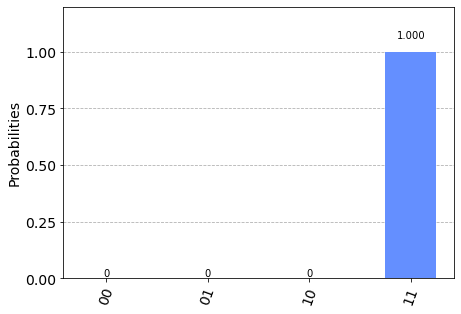

In [18]:
job = execute(dc1,backend,shots=100)

result = job.result()
counts = result.get_counts()
counts = complimentCount(counts)

plot_histogram(counts)

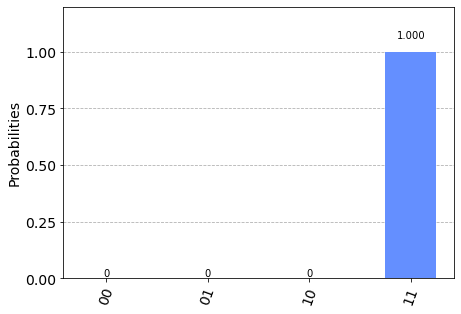

In [19]:
job = execute(dc2,backend,shots=10)
result = job.result()
counts = result.get_counts()
counts = complimentCount(counts)

plot_histogram(counts)

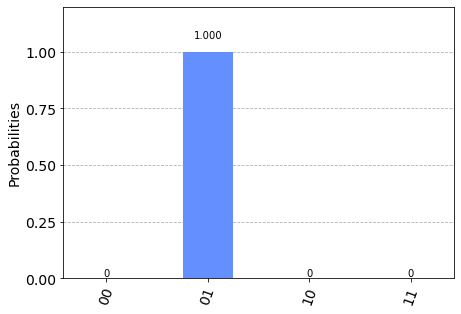

In [20]:
job = execute(dc3,backend,shots=10)
result = job.result()
counts = result.get_counts()
counts = complimentCount(counts)

plot_histogram(counts)

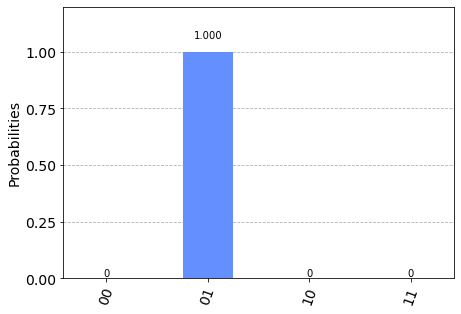

In [22]:
job = execute(dc4,backend,shots=10)
result = job.result()
counts = result.get_counts()
counts = complimentCount(counts)

plot_histogram(counts)

In [23]:
dc1.draw()

┌───┐┌───┐┌────────────┐┌───┐┌─┐   
q_0: ┤ X ├┤ H ├┤0           ├┤ H ├┤M├───
     ├───┤├───┤│  BlackBox1 │├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤1           ├┤ H ├─╫─┤M├
     └───┘└───┘└────────────┘└───┘ ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

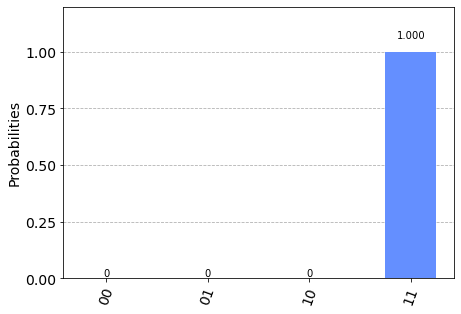

In [24]:
job = execute(dc1,backend,shots=100)

result = job.result()
counts = result.get_counts()
counts = complimentCount(counts)

plot_histogram(counts)